In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def load_data(subject, block, csv_data_folder):
    return pd.read_csv(f'{csv_data_folder}/{subject}pre_{block}.csv')

In [3]:
def scatter_and_save_fig(data, subject, block):
    sns.scatterplot(data=data,x='x_left',y='y_left',hue='label', palette=sns.color_palette("tab10", 2))
    plt.savefig(f'{subject}/scatter{subject}_block{block}',dpi=400)

In [4]:
def get_train_test_split(data):
    np_data = data.to_numpy()
    avg_x_eyes = np.average(np.array([np_data[:, 2], np_data[:, 4]]), axis=0)
    avg_y_eyes = np.average(np.array([np_data[:, 3], np_data[:, 5]]), axis=0)
    avg_eyes_data = np.column_stack([avg_x_eyes, avg_y_eyes])
    labels = np_data[:,1].astype('int64')
    return train_test_split(avg_eyes_data, labels, test_size=0.2)
        

In [5]:
def normalize_data(X, x_test):
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    x_test = scaler.transform(x_test)
    return X, x_test

In [6]:
def classic_svc(X, x_test, y, y_test, scores_dict, subject, block):
    clf = svm.SVC()
    clf.fit(X, y)
    score = clf.score(x_test,y_test)
    scores_dict[f'{subject}_{block}'] = score

In [7]:
def four_svc_and_figs(X, y, subject, block):
    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
            'LinearSVC (linear kernel)',
            'SVC with RBF kernel',
            'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate([svc, rbf_svc, poly_svc, lin_svc]):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        # plt.subplot(2, 2, i + 1)
        # plt.subplots_adjust(wspace=.1,hspace=.1)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(12,8))
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length', fontsize=18)
        plt.ylabel('Sepal width', fontsize=18)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i], fontsize=22)
        plt.savefig(f"{subject}/{titles[i]}_{block}.jpg")

    plt.show()

In [8]:
# run only once for all subjects
scores_dict = {}
num_blocks = 5
subjects = [f'00{i}' for i in range(3, 7)]
csv_data_folder = 'final_exp_decoding'

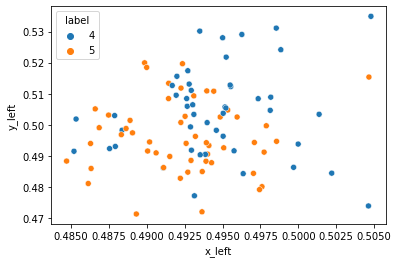

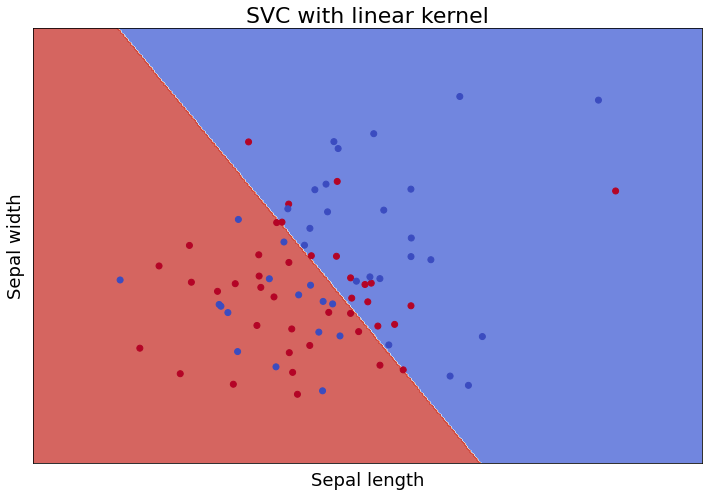

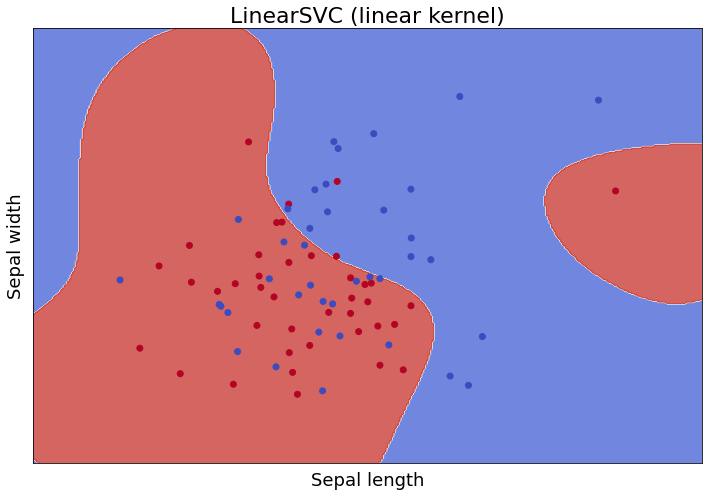

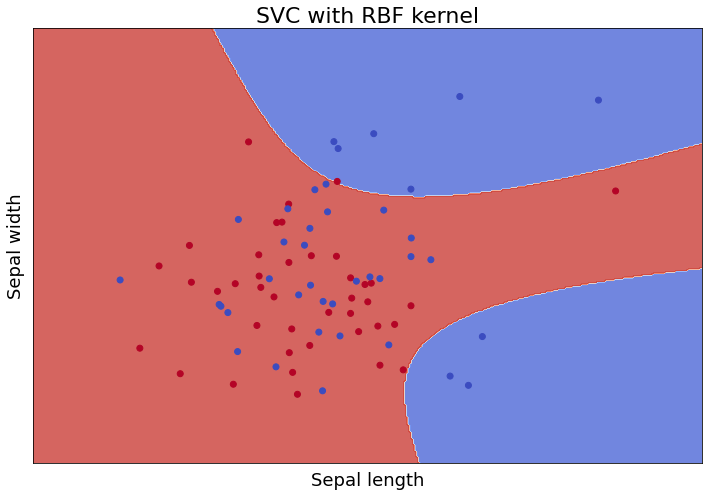

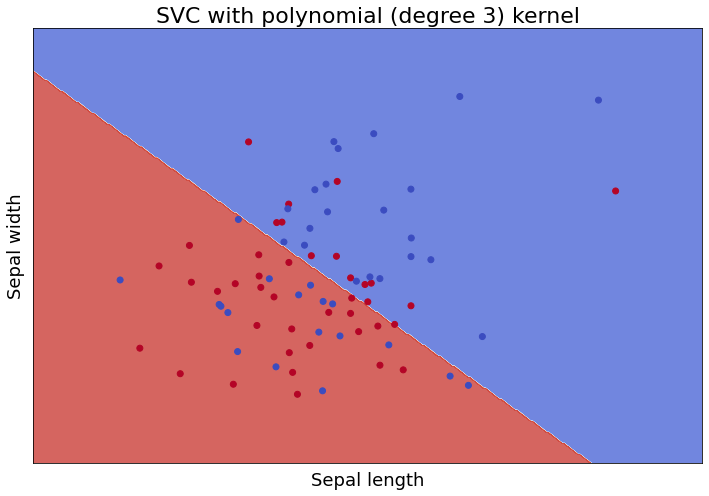

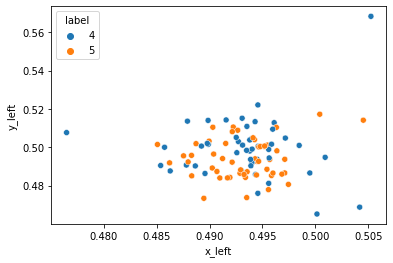

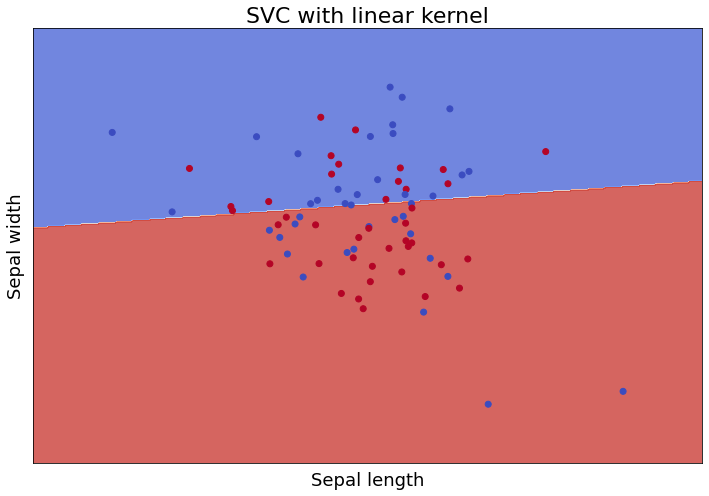

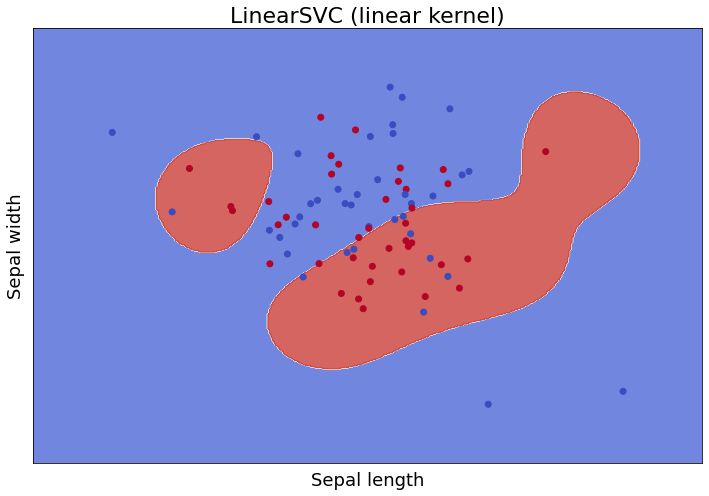

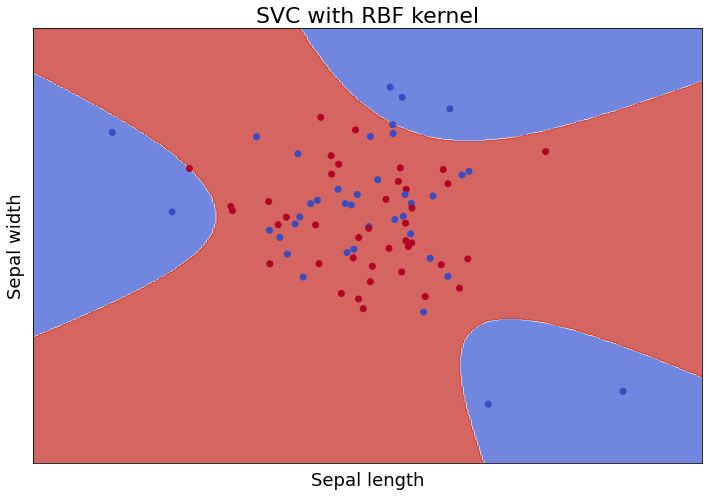

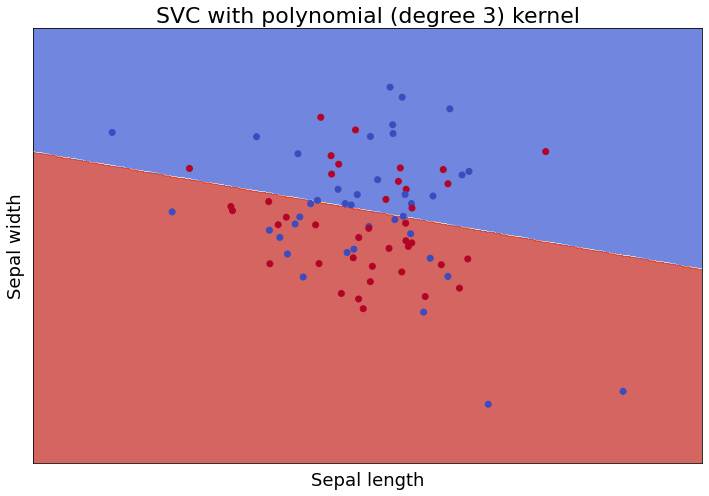

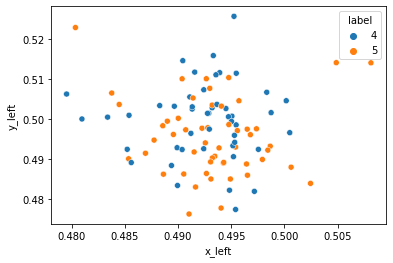

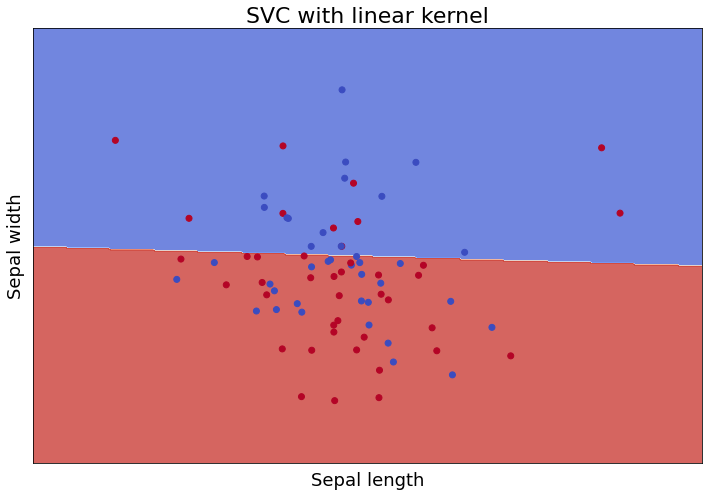

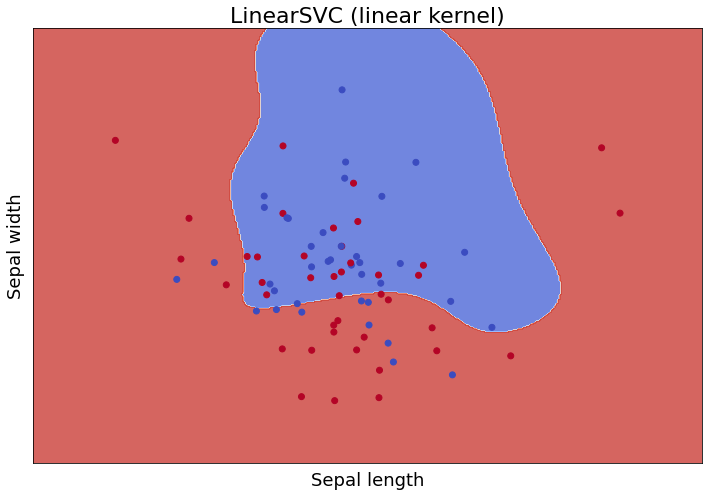

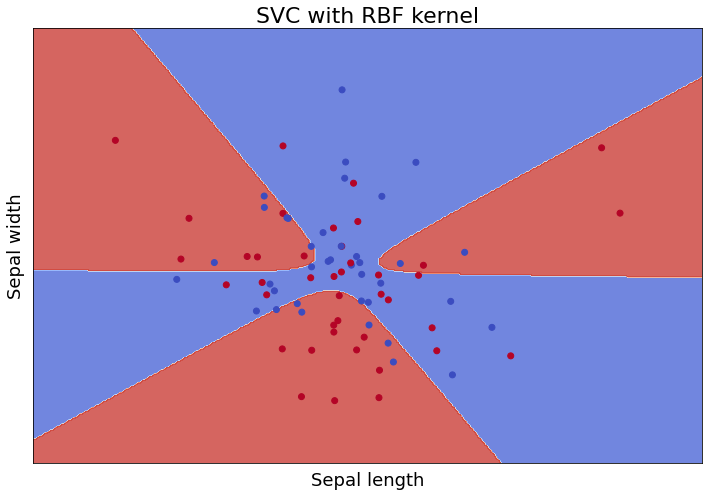

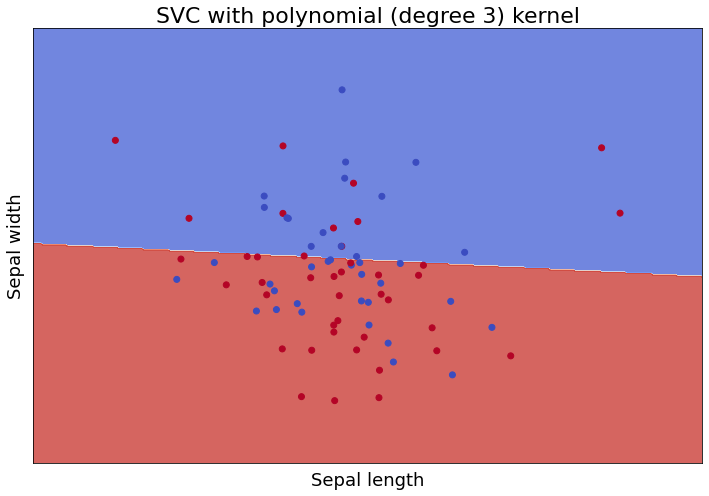

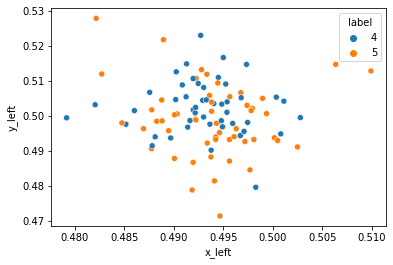

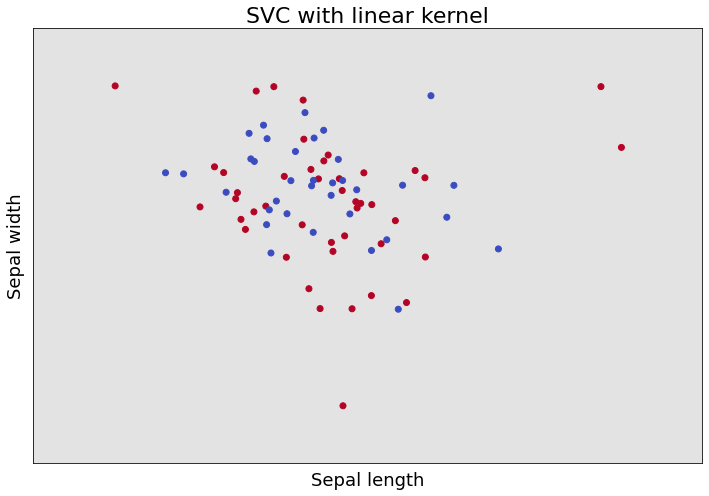

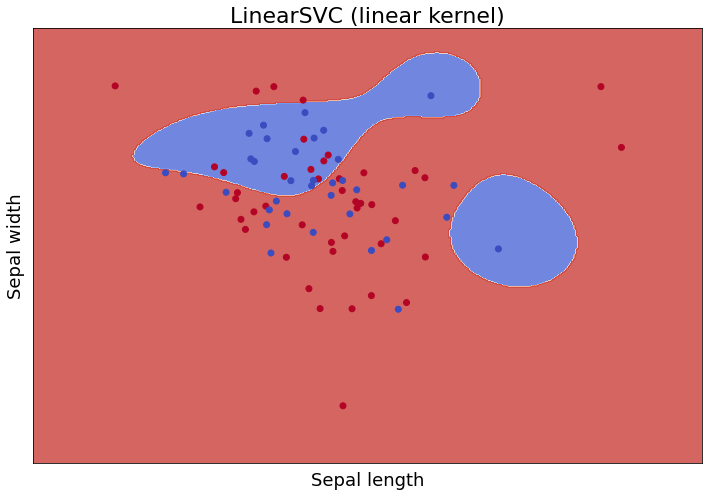

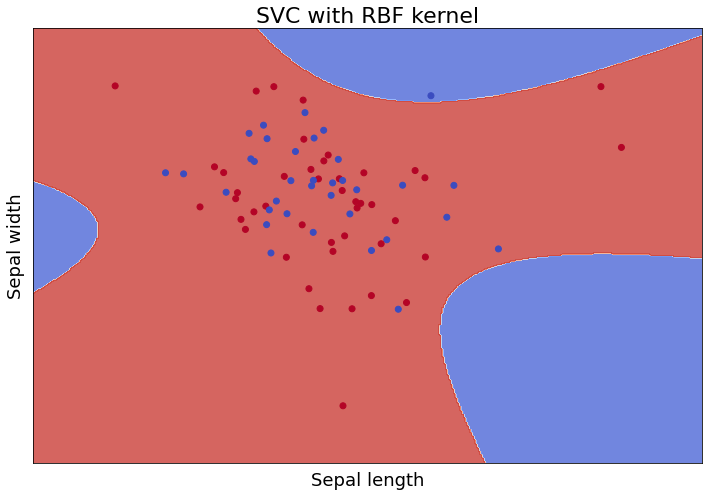

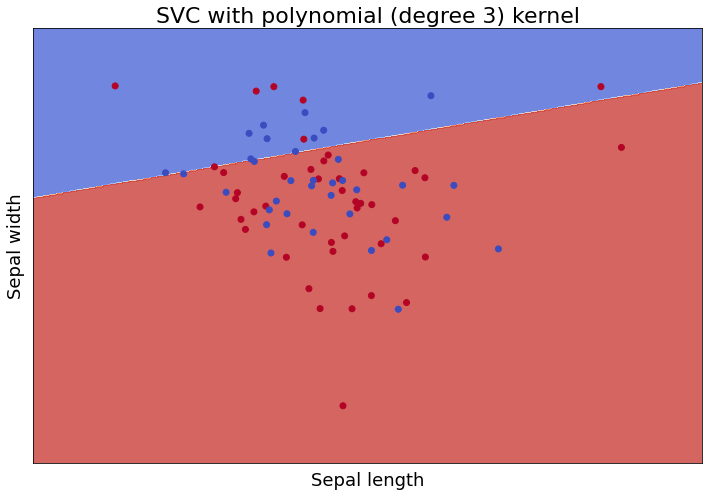

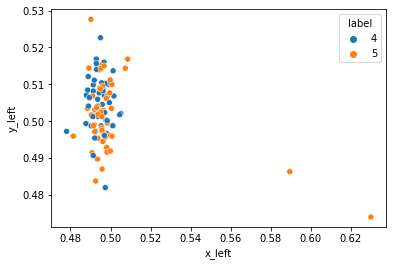

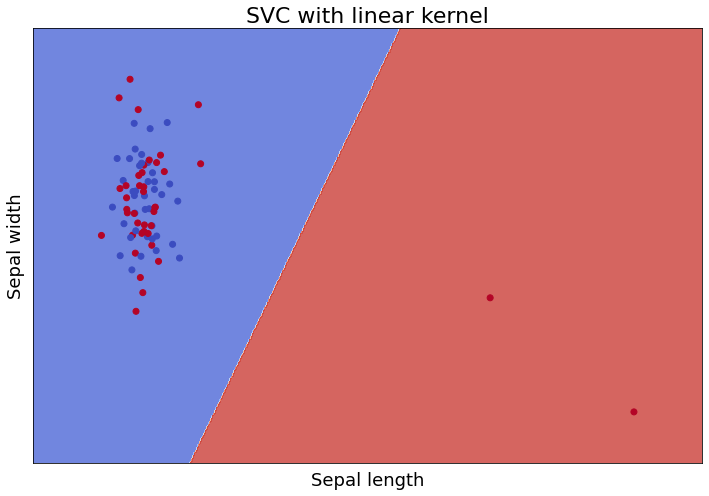

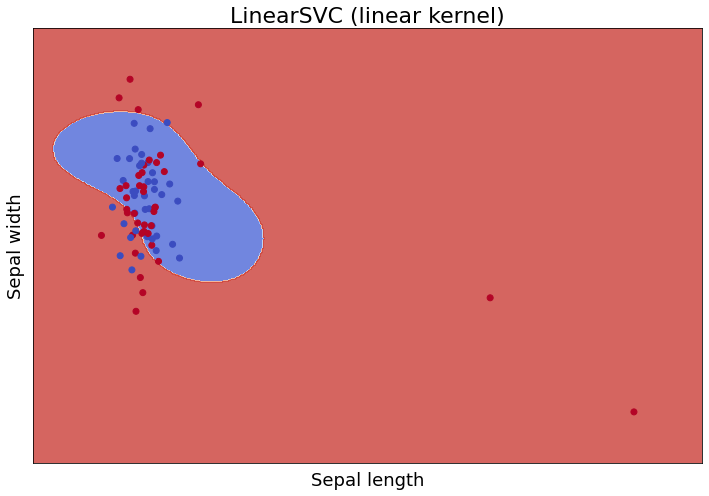

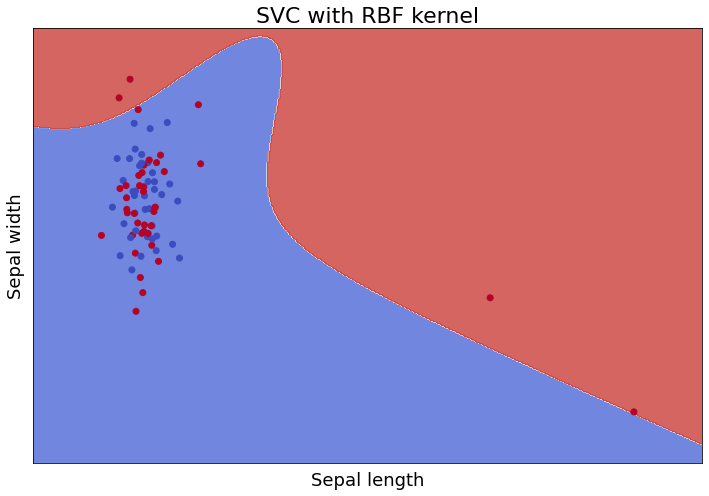

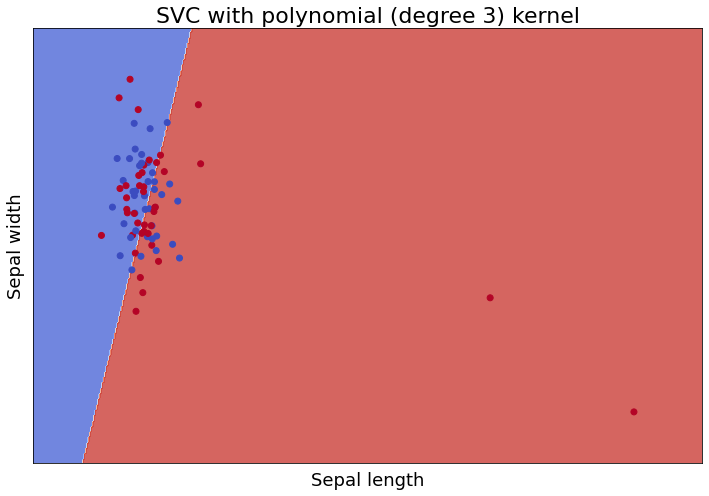

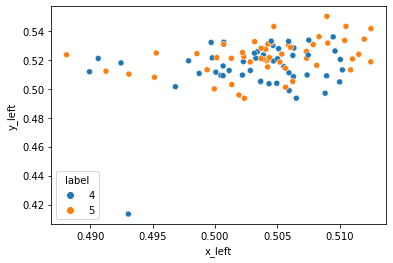

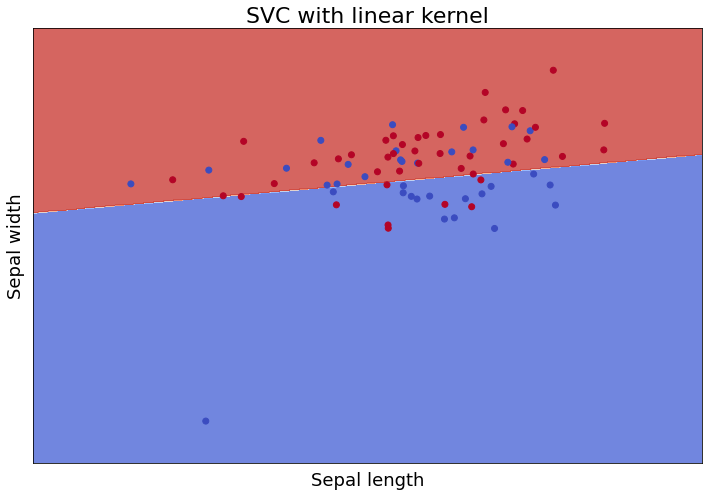

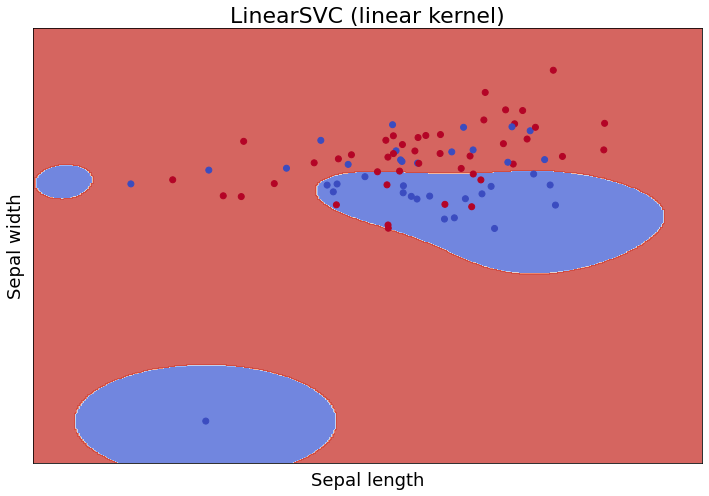

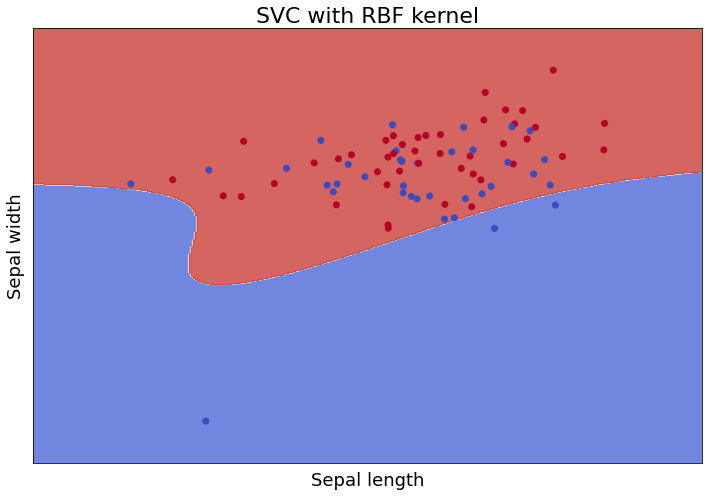

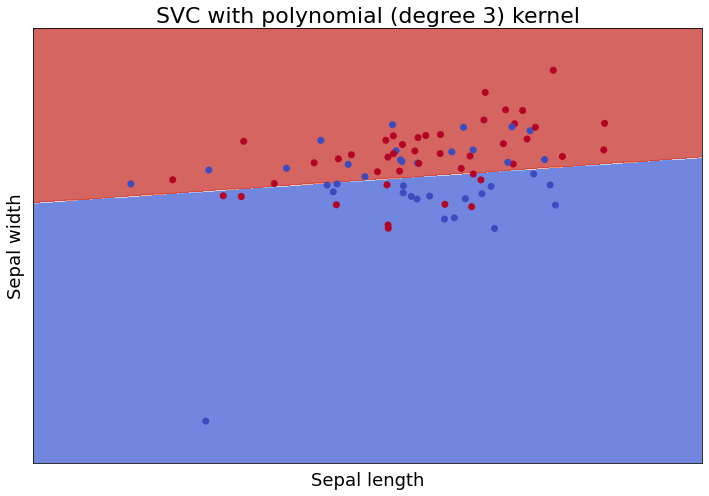

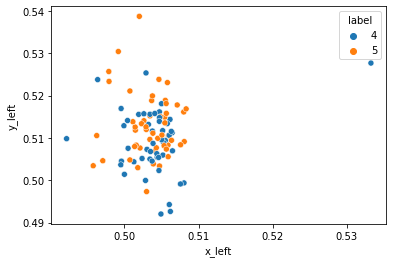

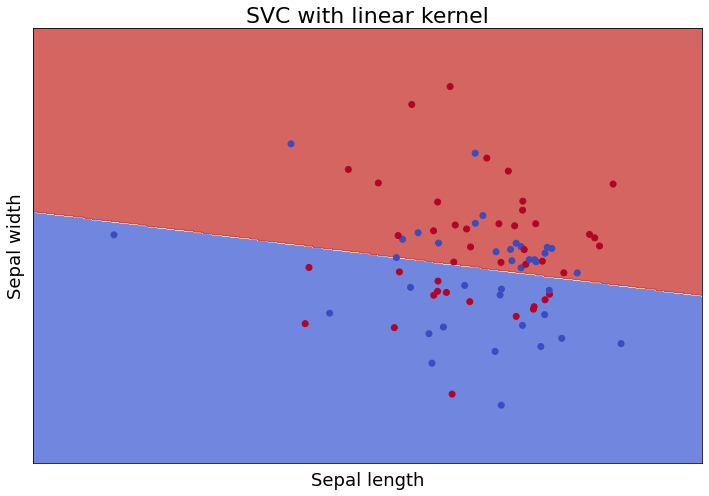

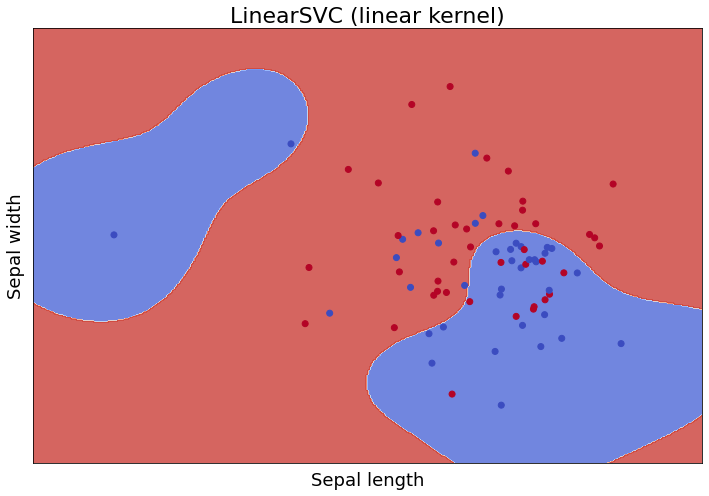

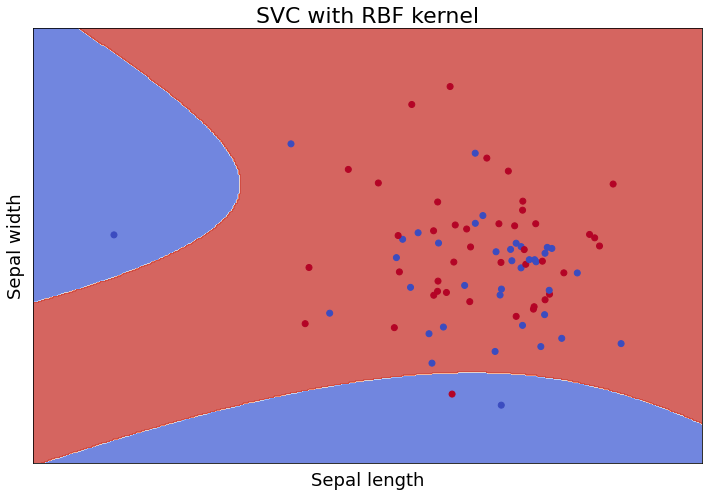

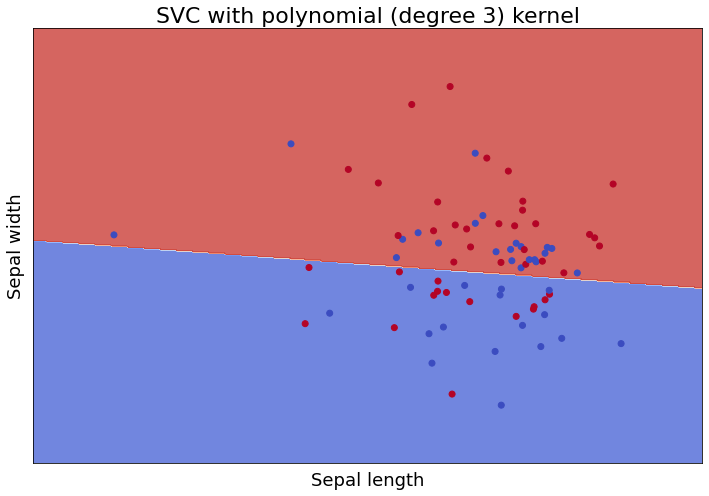

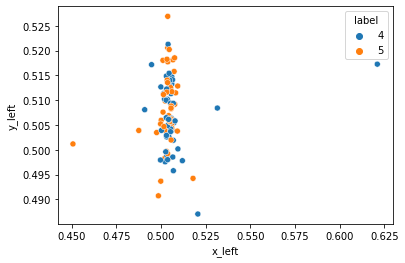

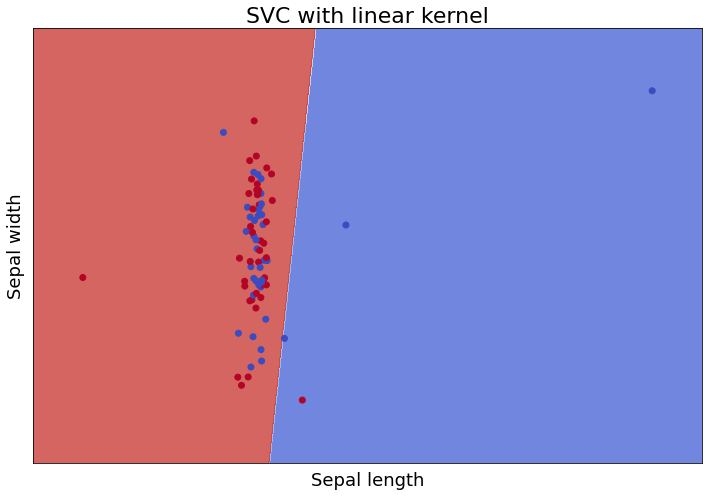

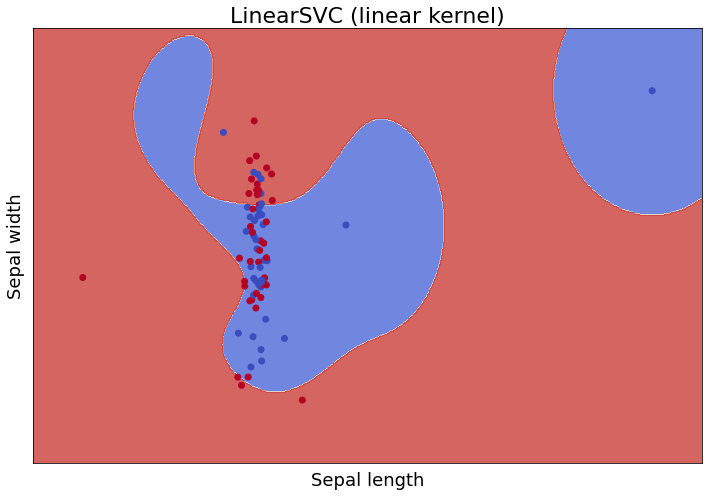

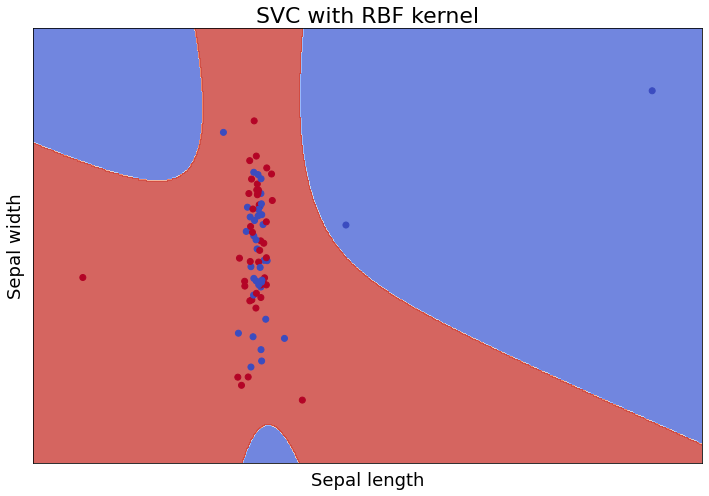

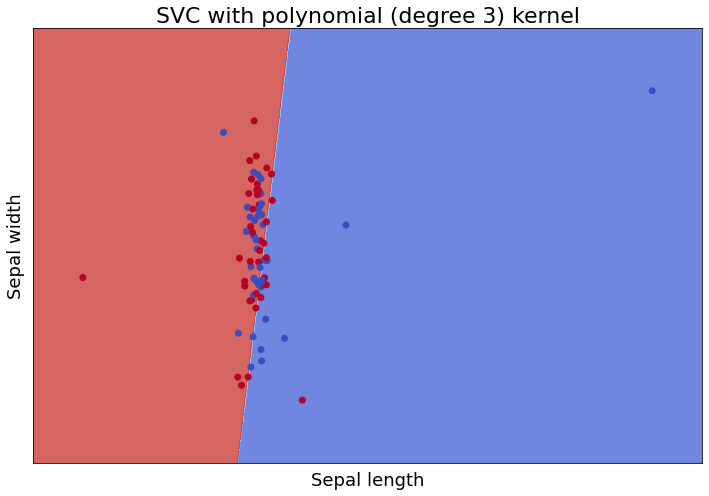

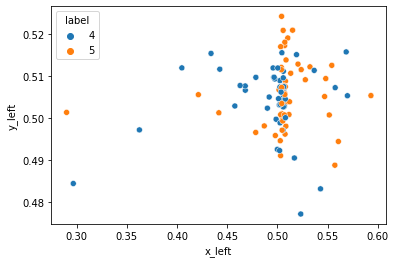

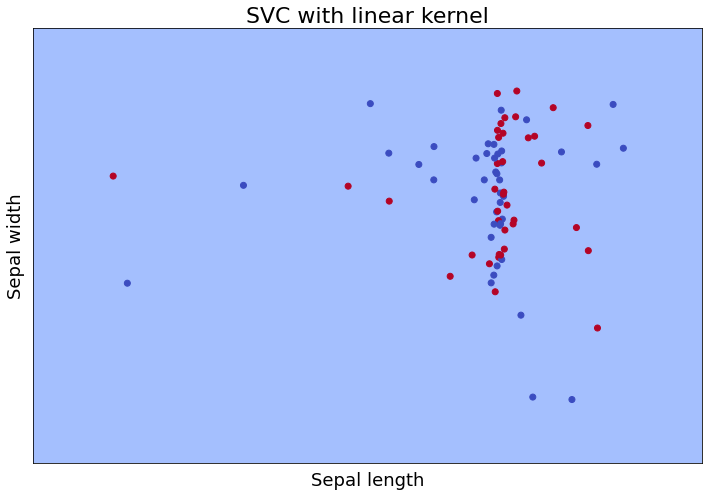

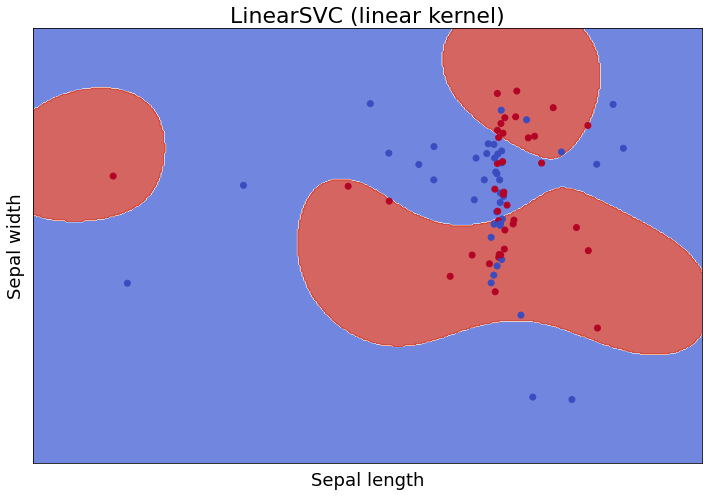

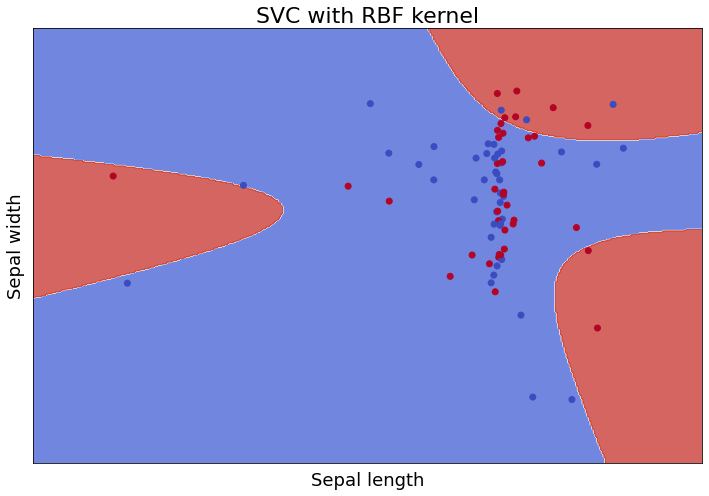

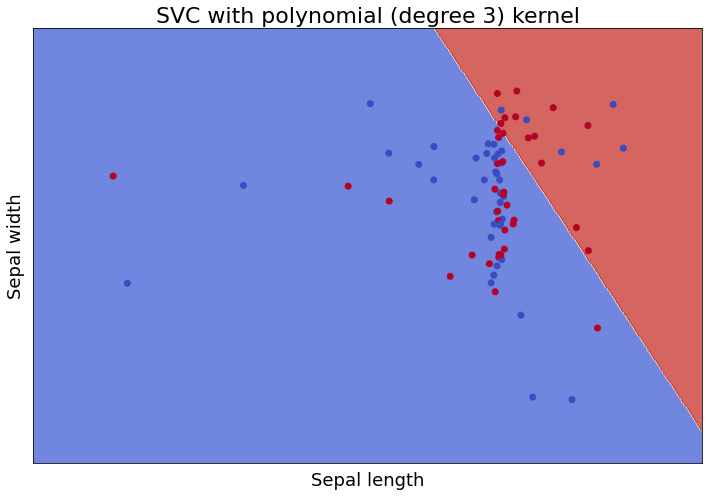

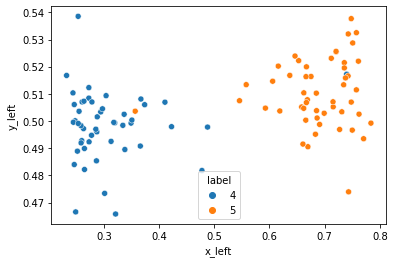

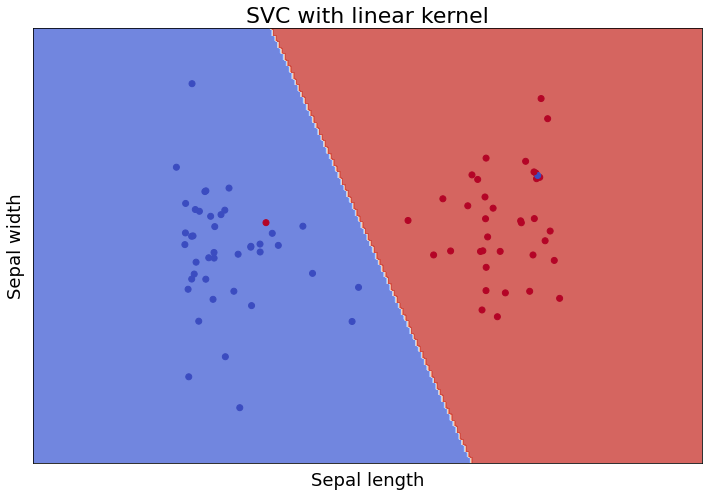

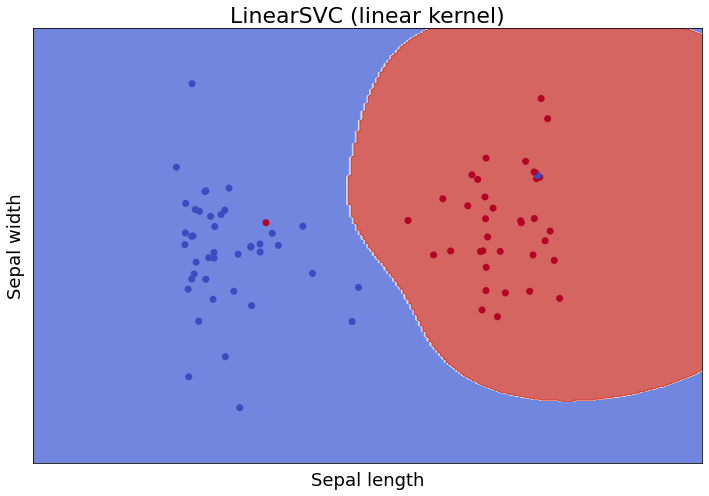

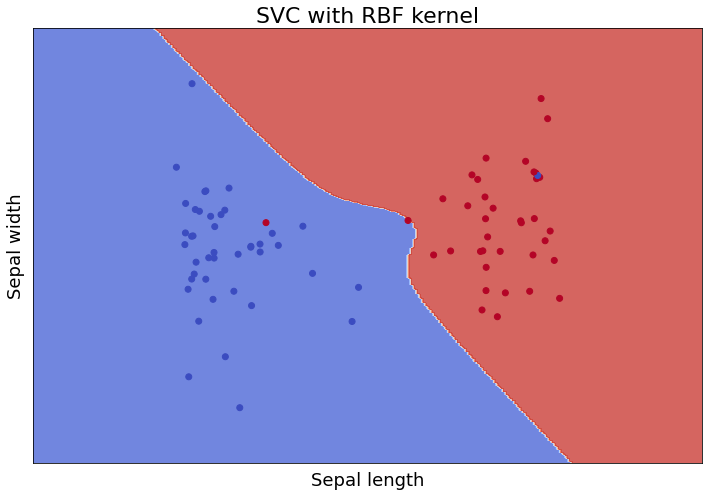

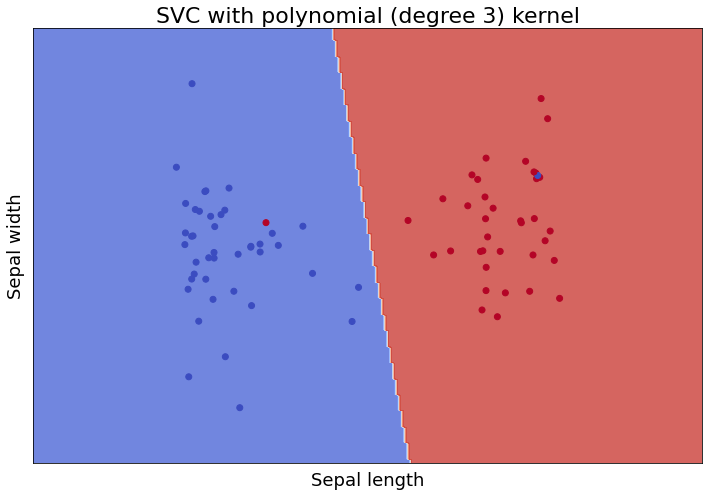

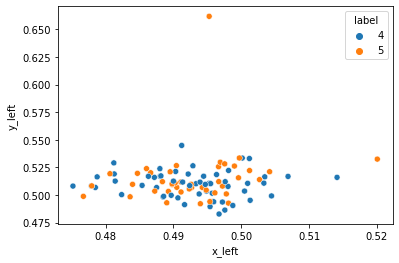

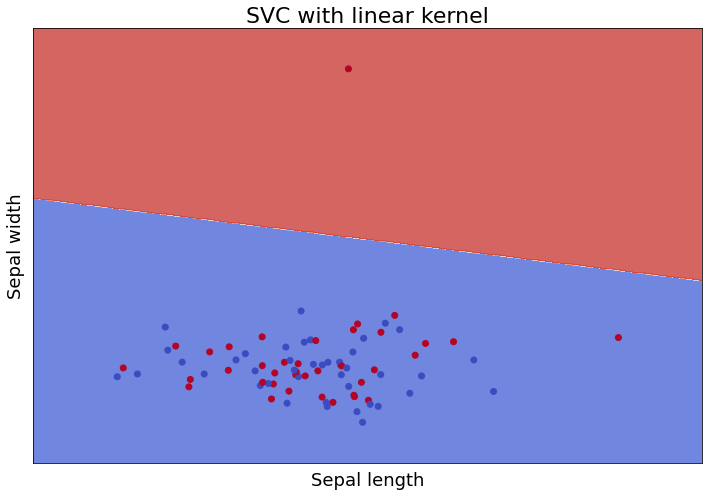

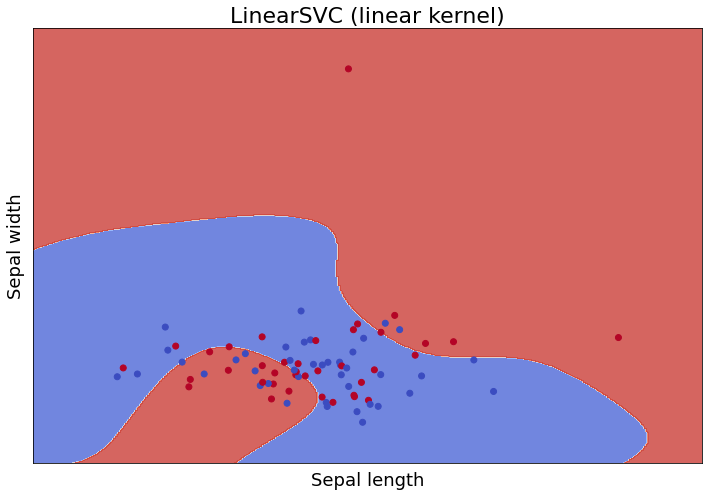

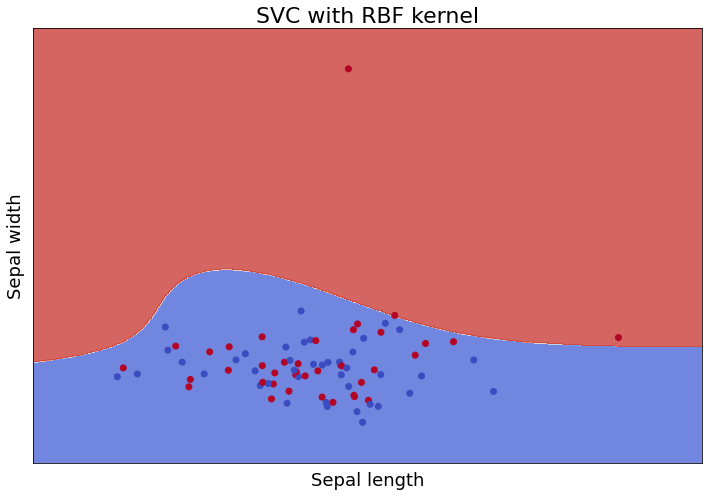

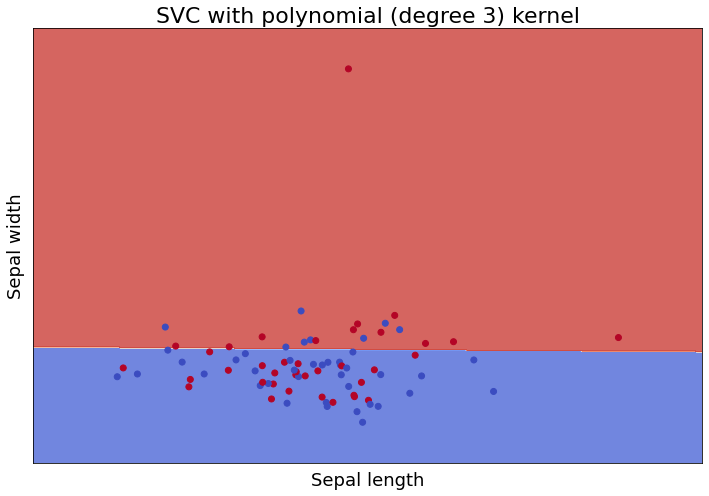

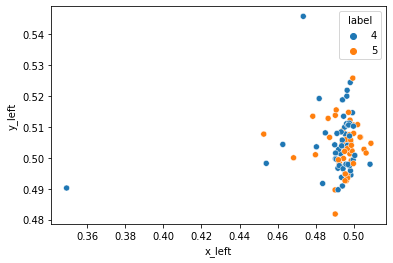

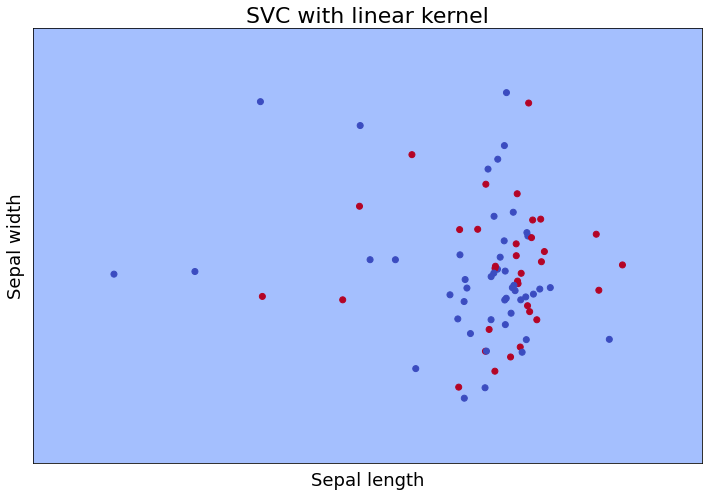

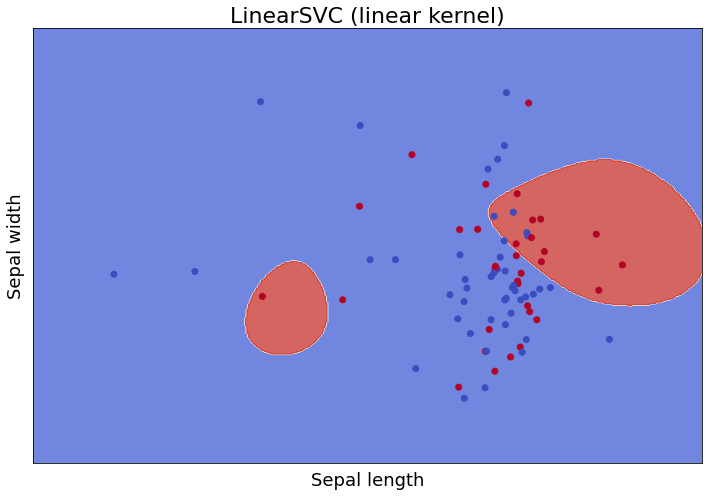

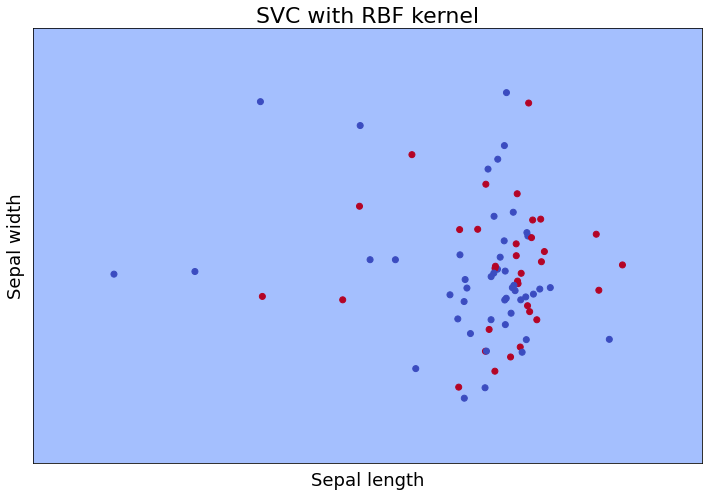

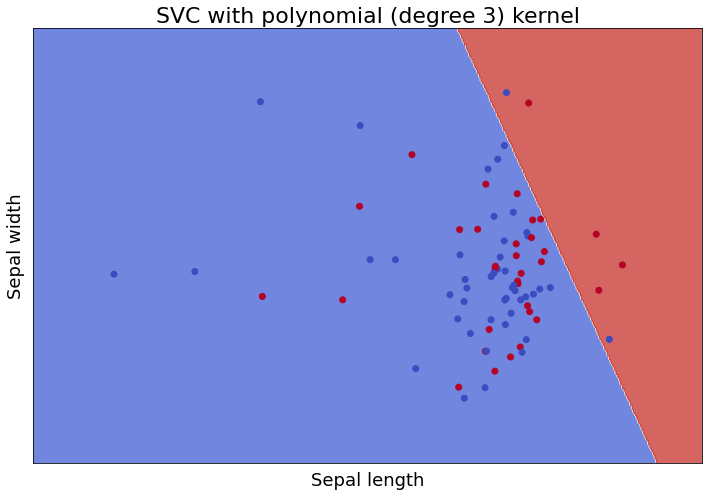

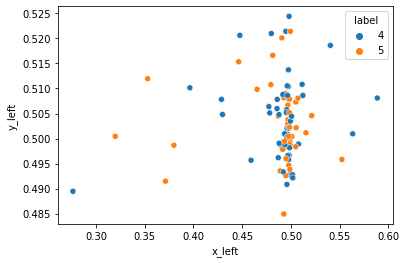

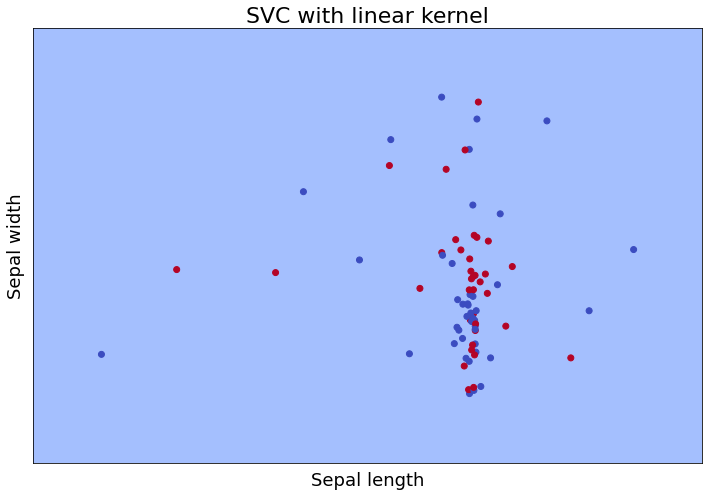

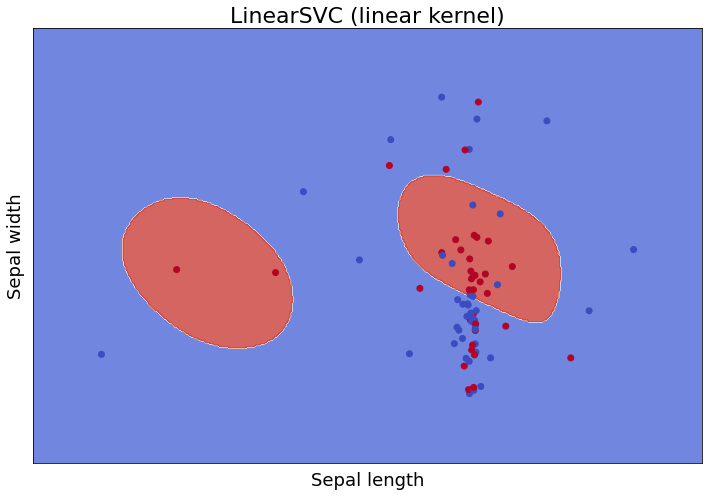

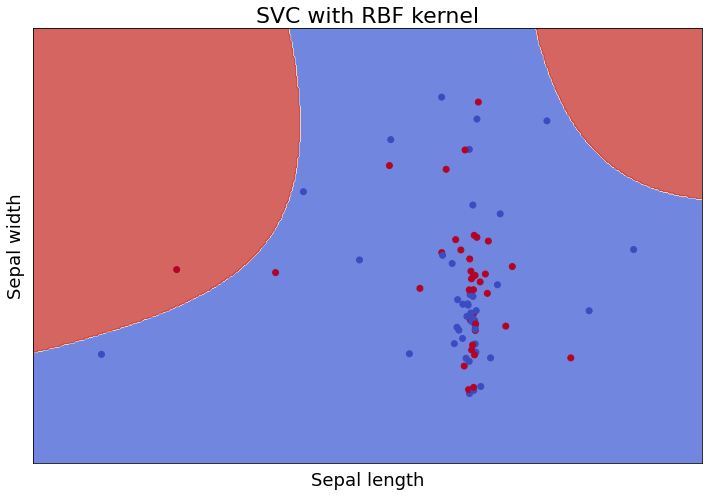

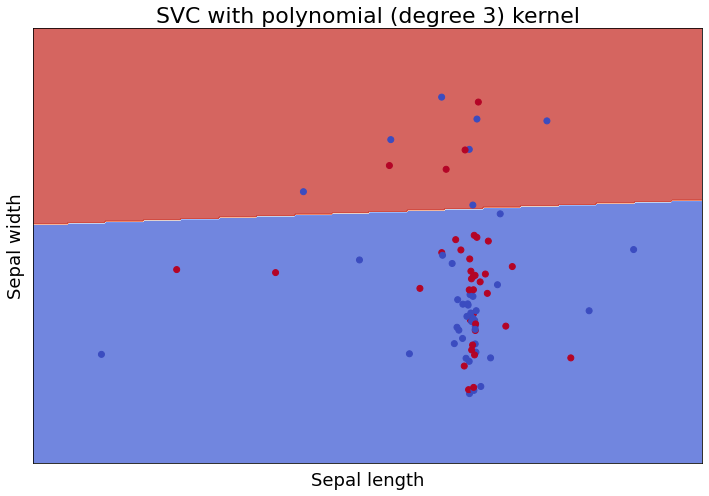

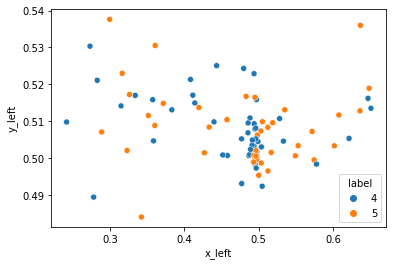

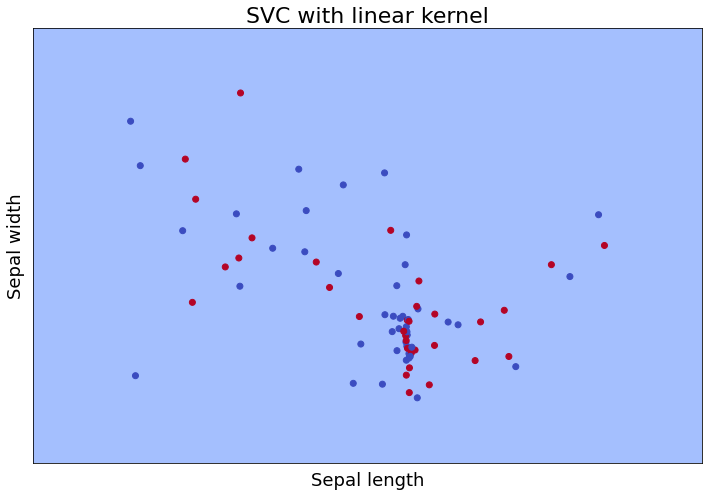

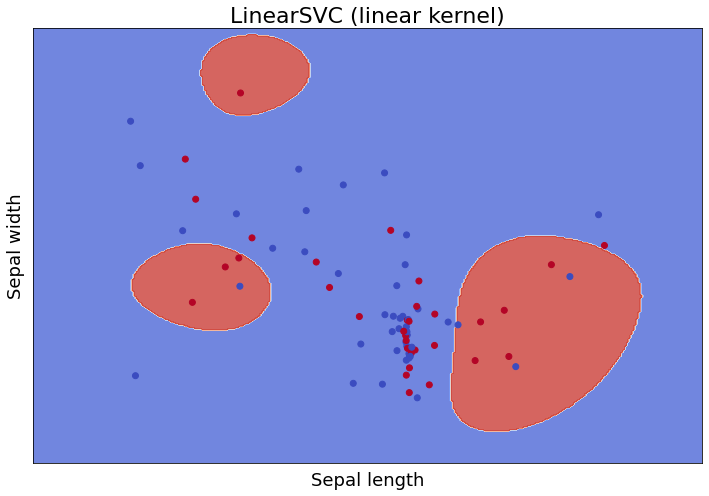

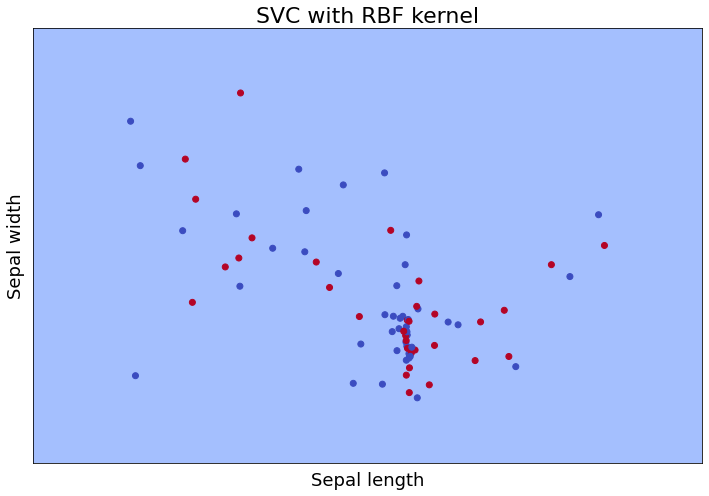

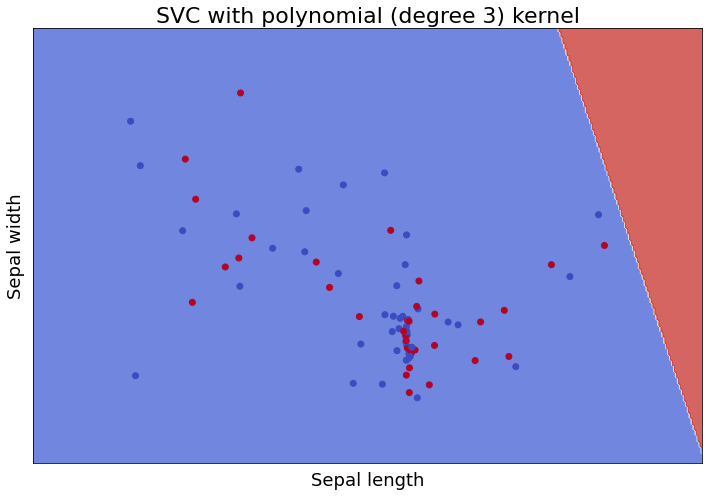

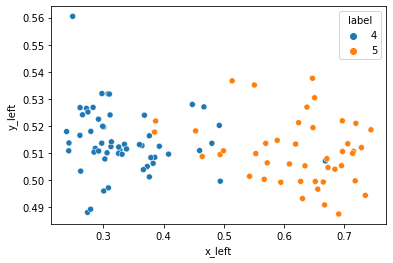

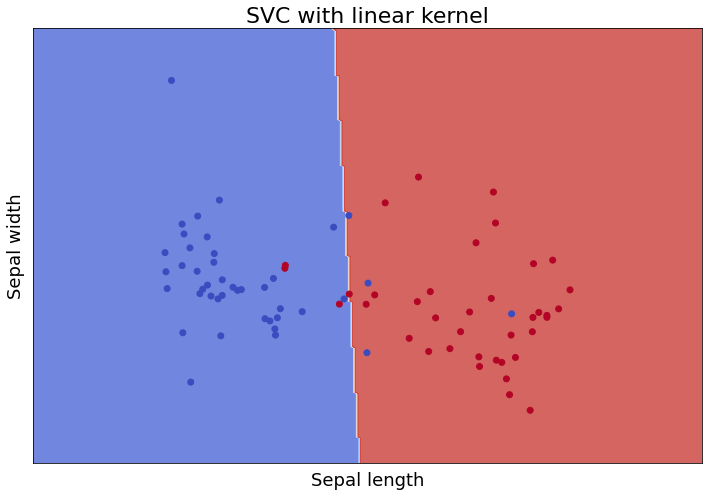

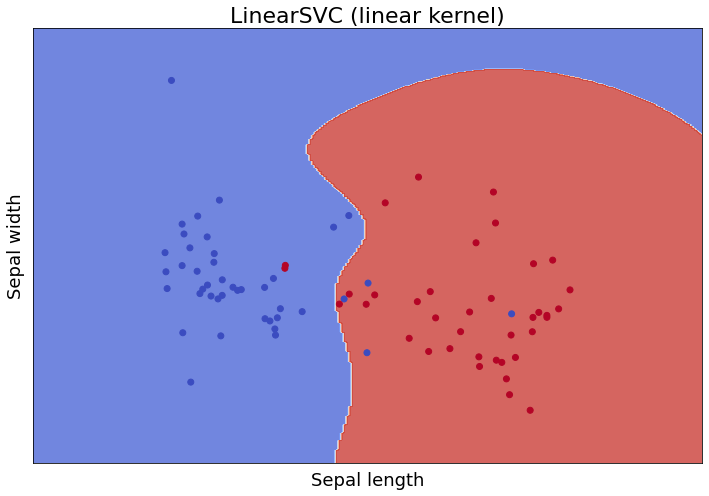

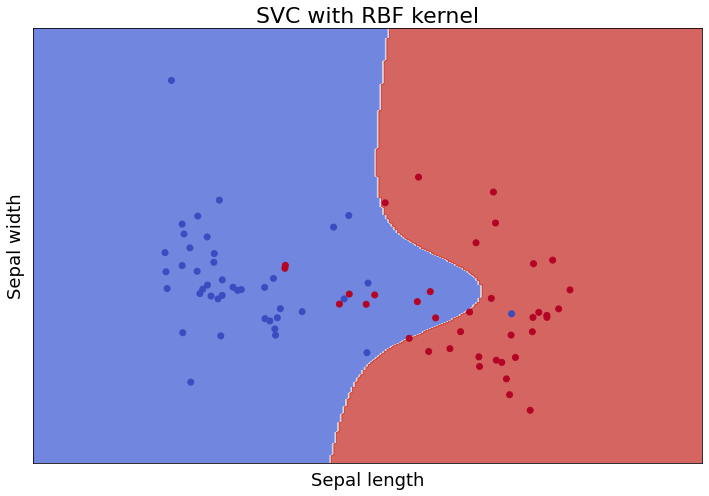

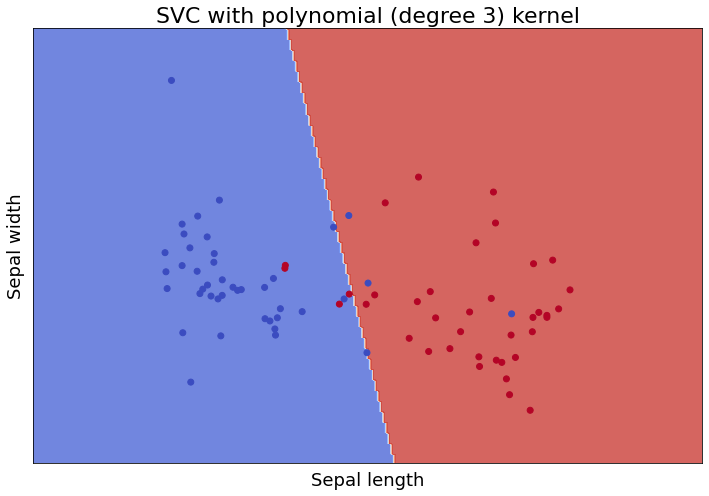

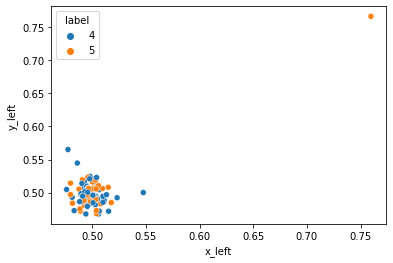

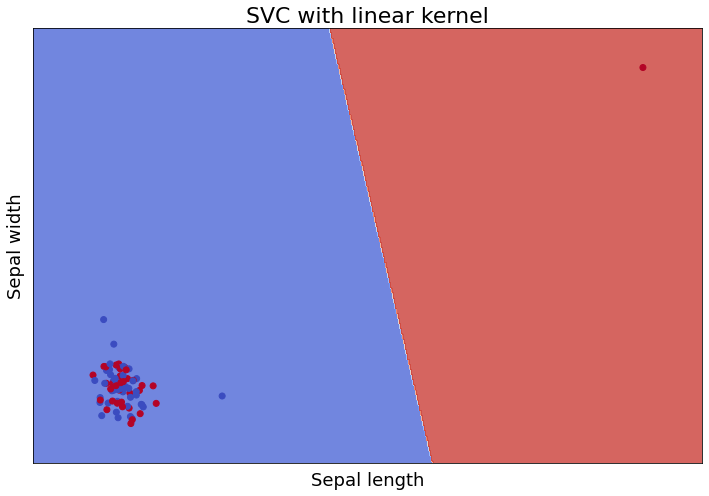

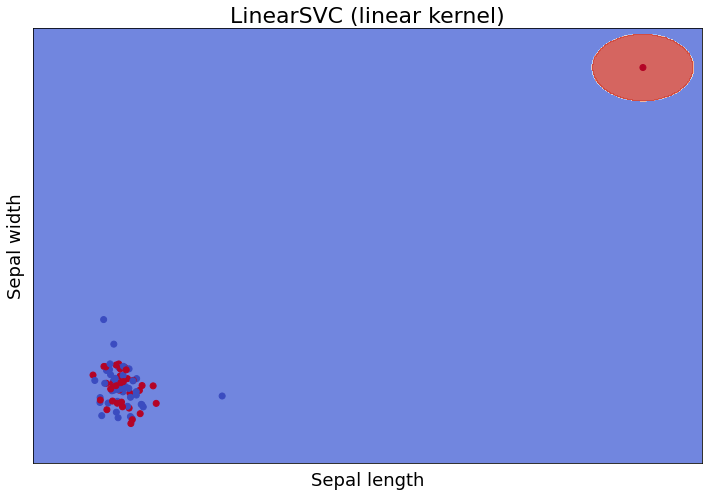

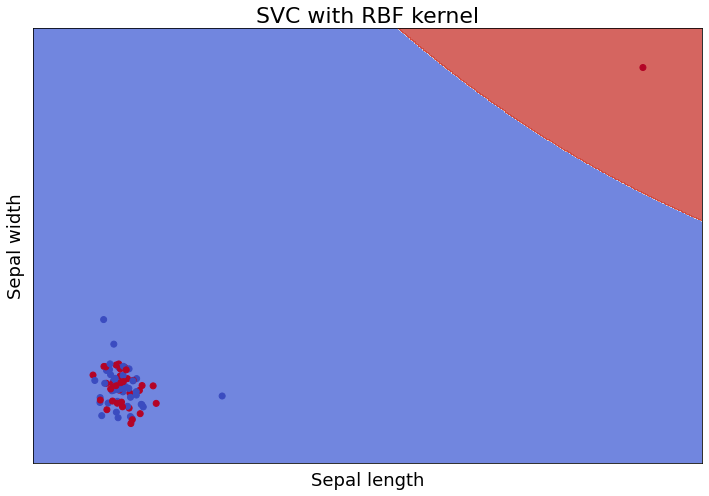

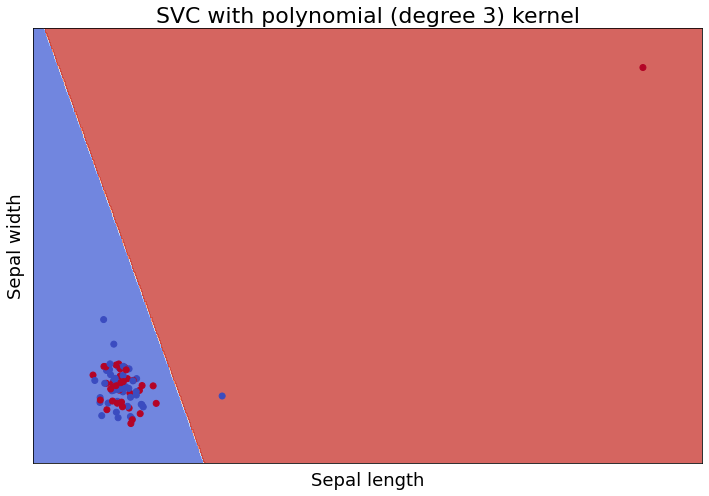

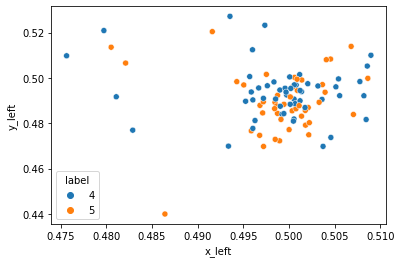

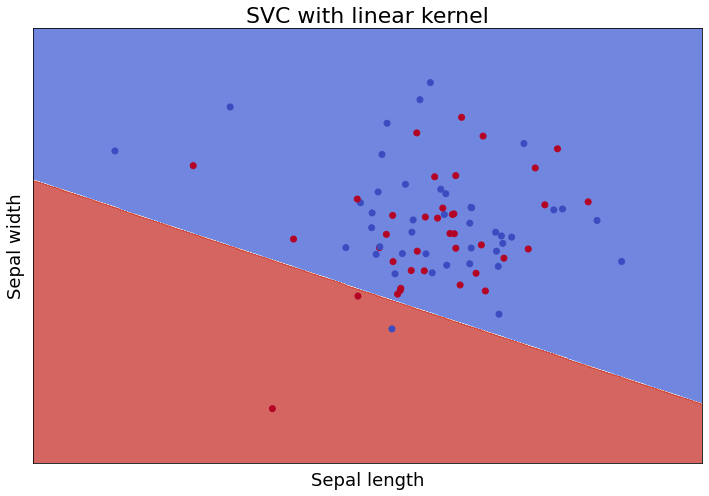

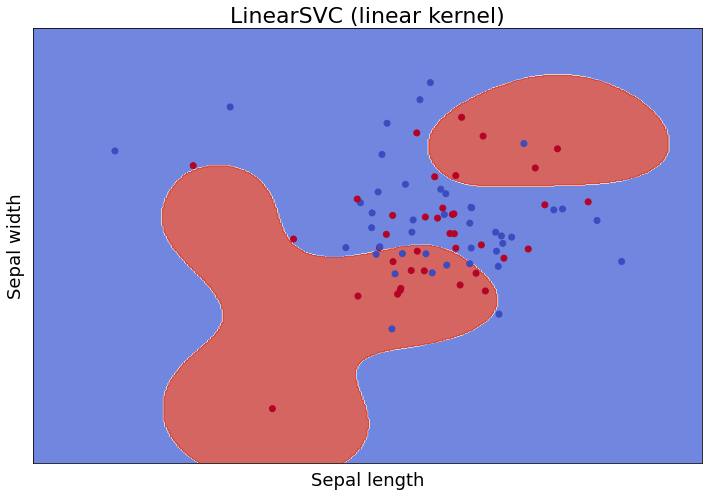

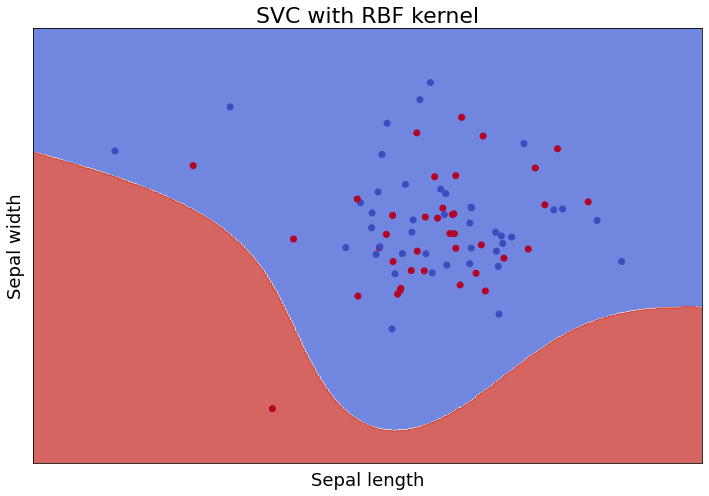

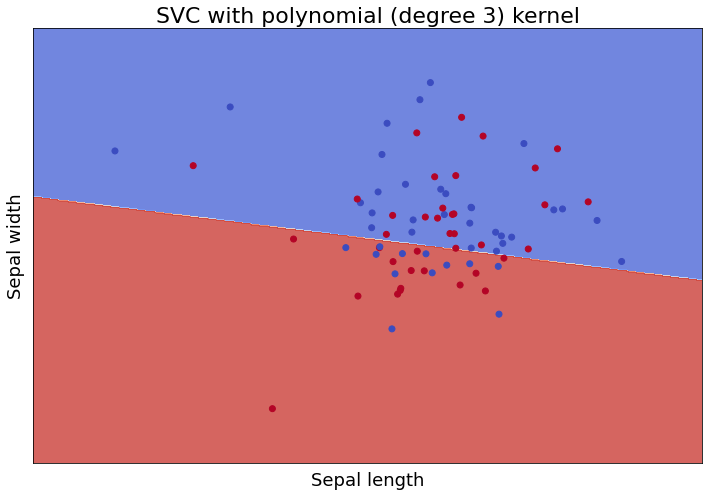

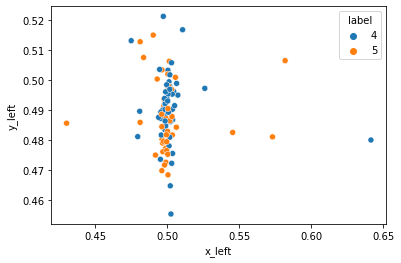

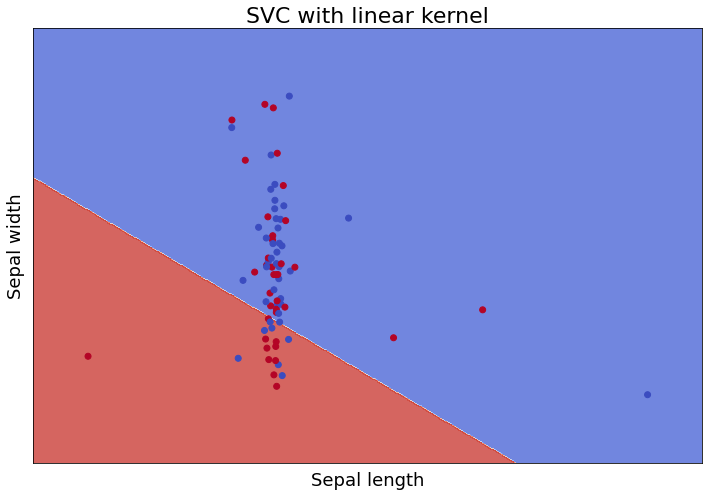

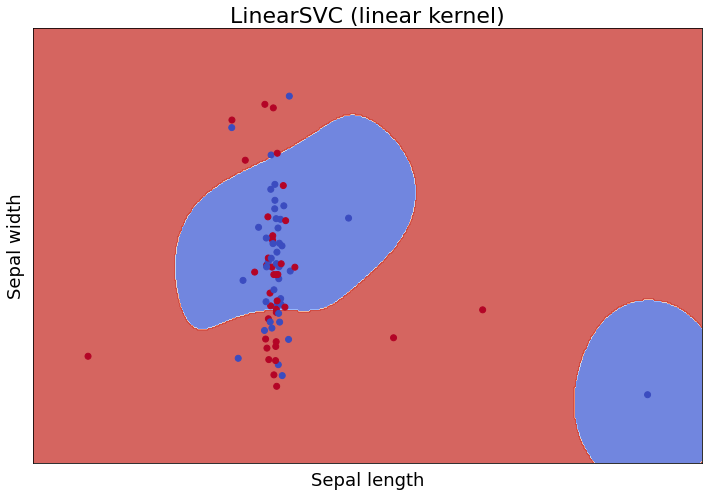

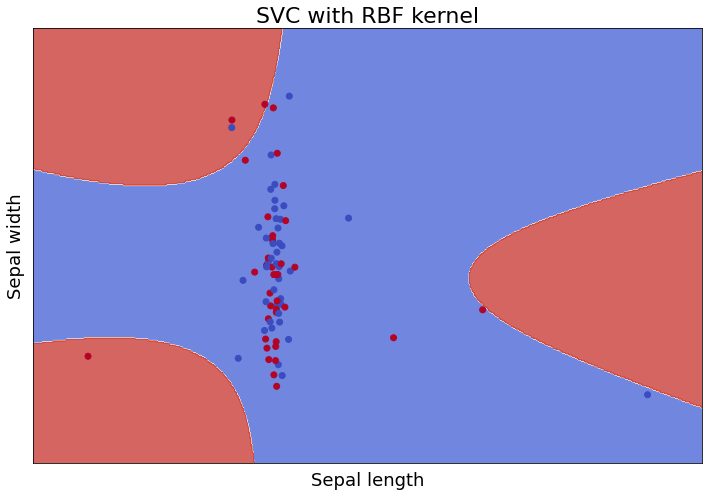

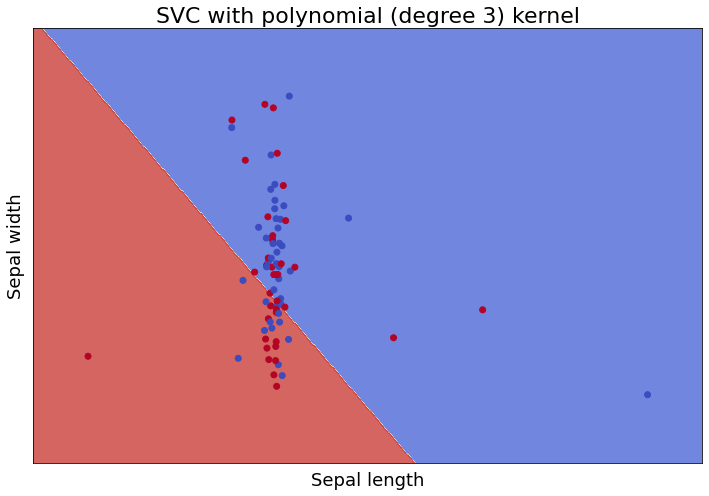

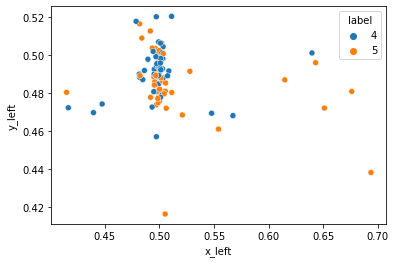

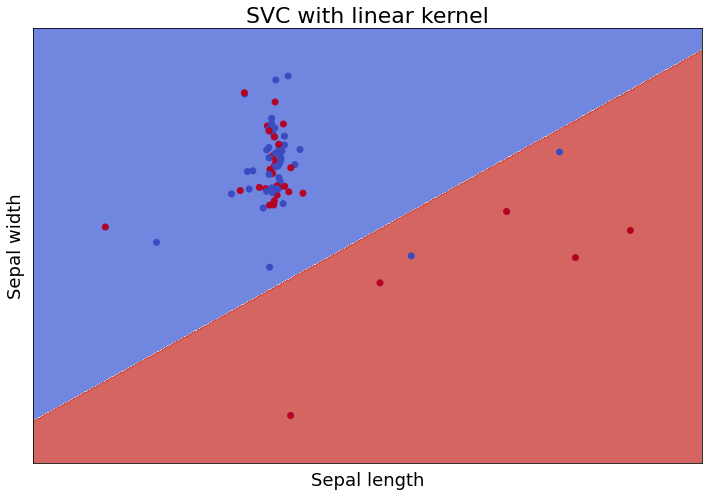

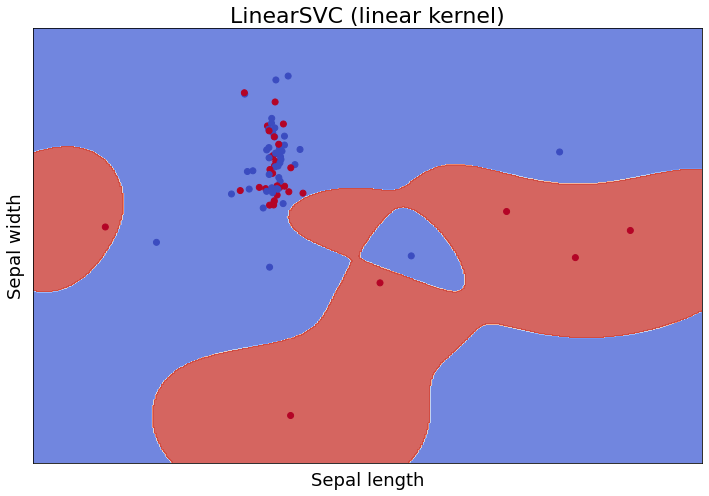

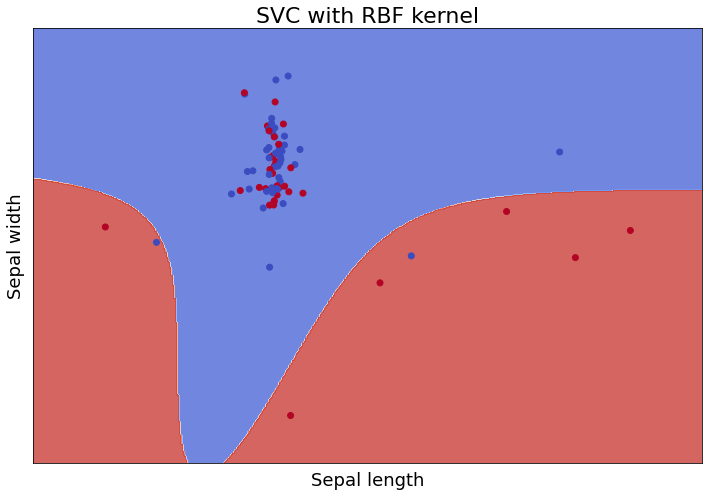

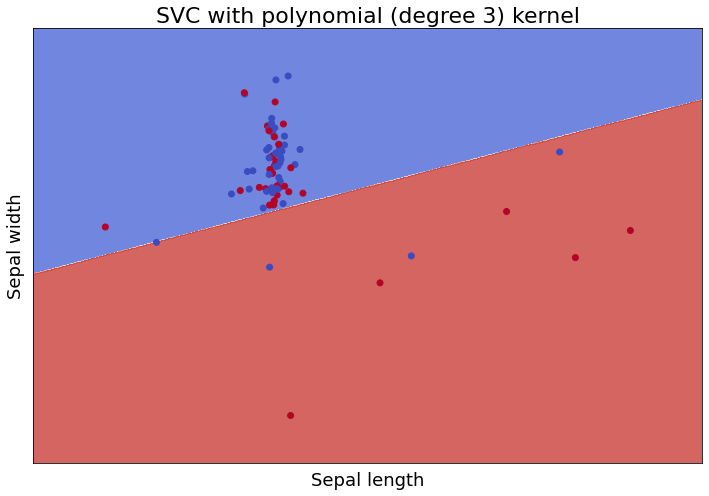

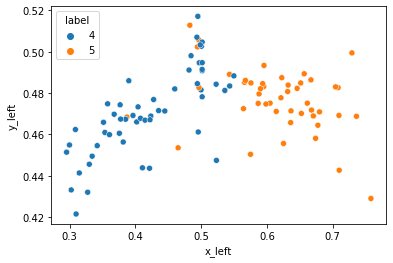

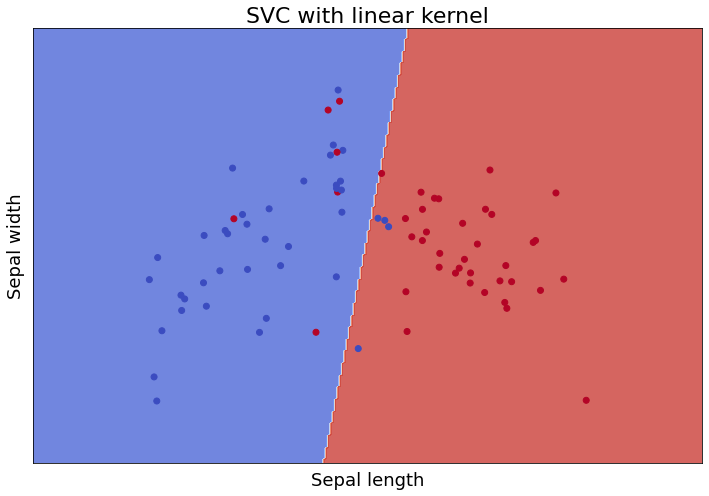

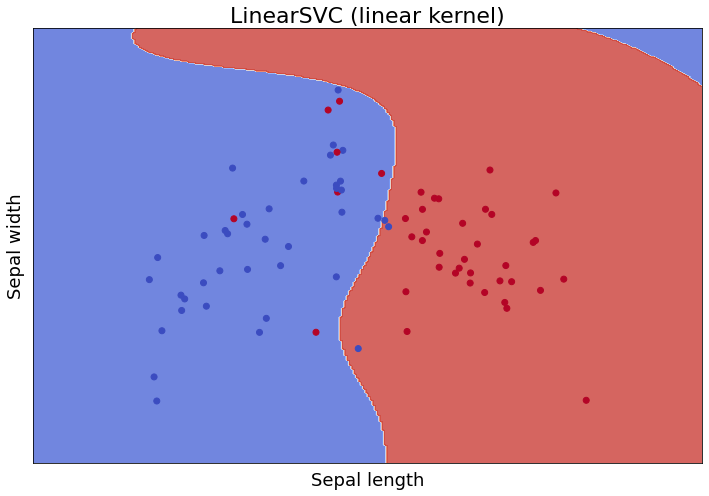

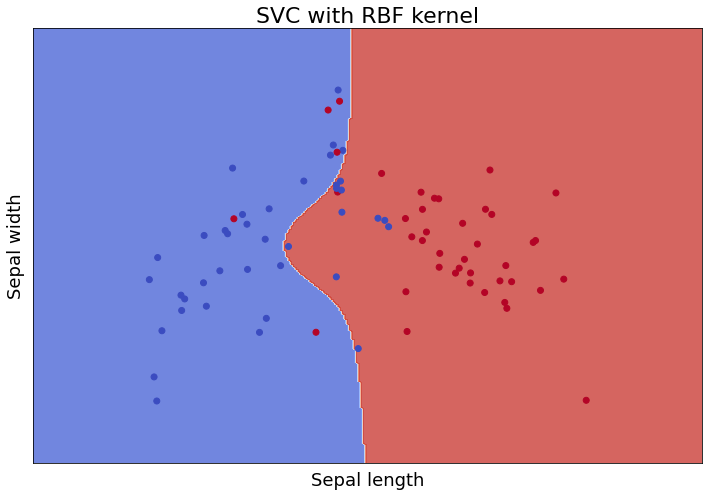

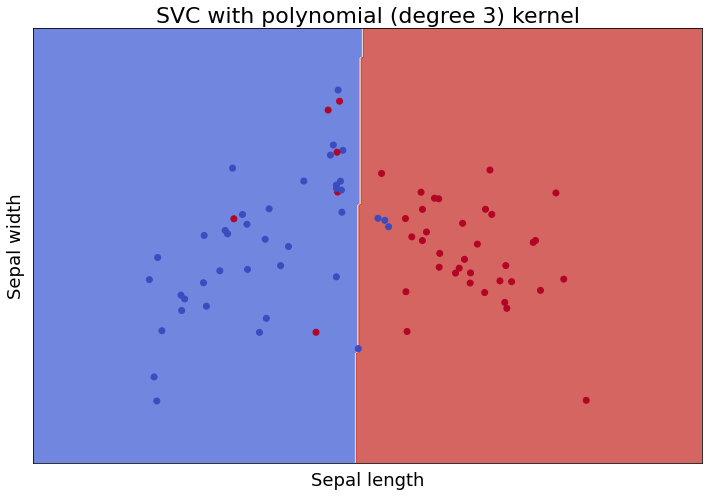

In [9]:
# main loop for classifiers 
for subject in subjects:
    for block in range(num_blocks):
        data = load_data(subject, block, csv_data_folder)
        scatter_and_save_fig(data, subject, block)
        X, x_test, y, y_test = get_train_test_split(data)
        X, x_test = normalize_data(X, x_test)
        classic_svc(X, x_test, y, y_test, scores_dict, subject, block)
        four_svc_and_figs(X, y, subject, block)

In [11]:
# run only once for all subjects
scores = pd.DataFrame(data=scores_dict, index=[0])
scores.to_csv("classic_svc_scores.csv")